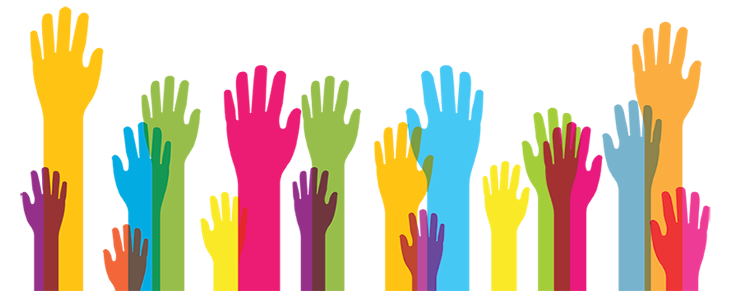
# Autism diagnosis ML Model based on Eye movement Tracking 
#### Crystal Rubalcava 
#### TRGN515 Spring 2023

# Table of Contents
* [1. Introduction](#intro)
* [2. Importing Libraries](#libraries)
* [3. Dataset](#dataset) (This is where the original df is created)
    * [3.1 Preparing the Dataset](#dataset_3_1) (This is where the df_copy is created.)
    * [3.2 Exploratory Analysis of Features](#dataset_3_2)
    * [3.3 Feature Selection](#dataset_3_3)
    * [3.4 Prepare the Final Feature Selection](#dataset_3_4)
* [4. Model Selection](#model_sel)
    * [4.1 Target Evaluation](#model_sel_4_1)
    * [4.2 Set up Training and Testing Datasets](#model_sel_4_2)
    * [4.3 Best Model Selection](#model_sel_4_3)
* [5. Principal Component Analysis to Reduce Data Dimensionality](#pca) (This is where df_pca is created.)
    * [5.1 Perform Standard Scaling on Training Dataset](#pca_5_1)
    * [5.2 Apply PCA to train dataset and test](#pca_5_2)
    * [5.3 Select Min # of Principal Components for Best Retained Variance](#pca_5_3)
    * [5.4 Top 3 Important Features in each component](#pca_5_4)
    * [5.1 Perform Standard Scaling on Training Dataset](#pca_5_1)
* [6. Model Performance with Pipeline](#model_perform)
* [7. Conclusion](#conclusion)
* [8. References](#references)
    

# 1. Introduction <a class="anchor" id="intro"></a>

* Autism spectrum disorder (ASD) is a neurodevelopmental disability in folks often affecting social communication and interaction, and restricted or repetitive behaviors or interests in folks. According to the CDC, about 1 in 36 children are diagnosed with autism in the US [[1]](https://www.cdc.gov/ncbddd/autism/data.html). Most children are not diagnosed until they reach school age, most being around 8 years old [[2]](https://www.cdc.gov/mmwr/volumes/72/ss/ss7202a1.htm?s_cid=ss7202a1_w). 

* This dataset is an eye-tracking dataset that was developed for the purpose of autism diagnosis from a group at Université de Picardie Jules Verne. Eye-tracking methods are used as a sign of autism where abnormalities of the eye gaze are largely recognised as the hallmark of autism [[3]](https://figshare.com/articles/dataset/Eye-Tracking_Dataset_to_Support_the_Research_on_Autism_Spectrum_Disorder/20113592). The group published this dataset in hopes of contributing to the scarces health data available for programs in artificial intelligence and machine learning. The overall goal of this dataset was to providing an eye-tracking data set for researchers of ASD in hopes of developing diagnostic models that can help detect autism at an early stage of childhood development.

* There are 25 csv files available for public use. I will be using a subset this dataset to showcase my work in trying to determine how eye-tracking could be used to diagnose autism at an earlier age. I used jupter notebook to do this project.


# 2. Importing Libraries <a class="anchor" id="libraries"></a>
* The following libraries Ire used in this project. I are preloading all libraries before I begin the project. 



In [1]:
%matplotlib inline

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib import pyplot
import imblearn as imblearn
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn import metrics
from sklearn.metrics import confusion_matrix
from sklearn.pipeline import Pipeline
from sklearn.decomposition import PCA
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.model_selection import GridSearchCV


# 3. Dataset <a class="anchor" id="dataset"></a>

#### *Eye-tracking Dataset to Support the Research on Autism Spectrum Disorder*

* Download the public pdf from [https://doi.org/10.6084/m9.figshare.20113592](https://figshare.com/articles/dataset/Eye-Tracking_Dataset_to_Support_the_Research_on_Autism_Spectrum_Disorder/20113592)
* There is a metadata CSV and 25 individual CSV files containing data from 25 different record points and multiple research participants in each CSV. For this project, I chose to select the first CSV file. Both the metadata.csv and the 1.csv are found in this repository. Selecting the link above will also lead you to the additional csv files.
* The metadata CSV and the indivdual CSV files are combined via Excel's ```VLOOKUP``` function using the participant ID to link both tables. 
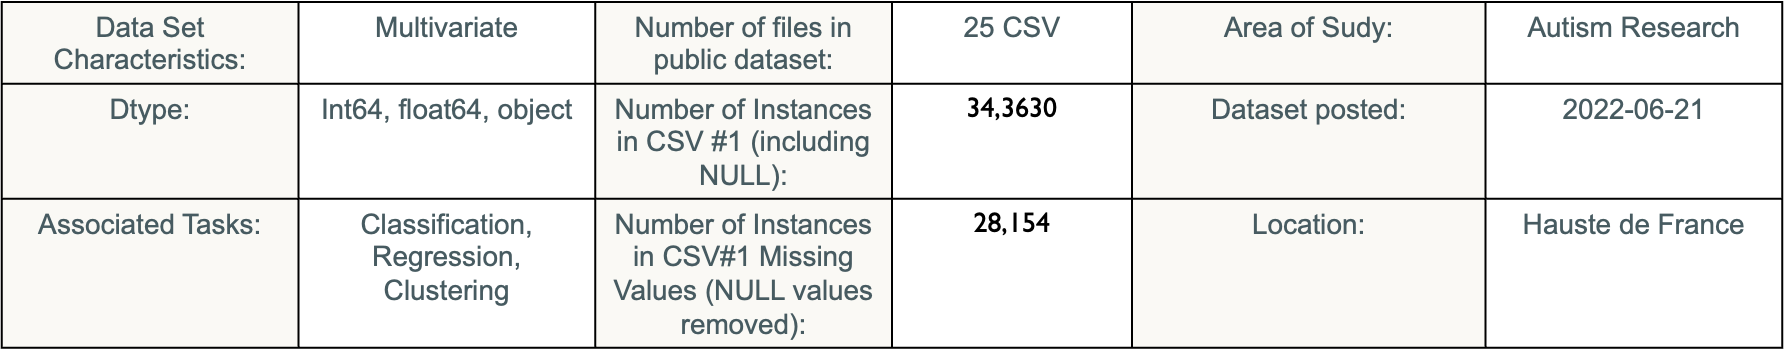
* This dataset was selected based on personal interest in this field of study as Ill as the amount of data that is available to creating a Machine Learning project.

## 3.1 Preparing the Dataset <a class="anchor" id="dataset_3_1"></a>

In [2]:
df = pd.read_csv('/scratch/cr96929-F22/trgn515_2023/trgn515_2023/final_project/1.csv')
df.tail(10)

/usr/local/lib/python3.6/site-packages/IPython/core/interactiveshell.py:3072: DtypeWarning: Columns (7) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


,Row,RecordingTime [ms],Time of Day [h:m:s:ms],Trial,Stimulus,Export Start Trial Time [ms],Export End Trial Time [ms],Participant,Gender,Age,...,Gaze Vector Left Y,Gaze Vector Left Z,Annotation Name,Annotation Description,Annotation Tags,Mouse Position X [px],Mouse Position Y [px],Scroll Direction X,Scroll Direction Y,Content
34620,34620,4778503.282,08:42:07:010,Trial020,20 eye tracking (ballon droite).avi,0,52026.058,18,M,11.7,...,0,0,-,-,-,-,-,-,-,-
34621,34621,4778547.283,08:42:07:054,Trial020,20 eye tracking (ballon droite).avi,0,52026.058,18,M,11.7,...,0,0,-,-,-,-,-,-,-,-
34622,34622,4778591.408,08:42:07:098,Trial020,20 eye tracking (ballon droite).avi,0,52026.058,18,M,11.7,...,0,0,-,-,-,-,-,-,-,-
34623,34623,4778635.413,08:42:07:142,Trial020,20 eye tracking (ballon droite).avi,0,52026.058,18,M,11.7,...,0,0,-,-,-,-,-,-,-,-
34624,34624,4778679.429,08:42:07:186,Trial020,20 eye tracking (ballon droite).avi,0,52026.058,18,M,11.7,...,0,0,-,-,-,-,-,-,-,-
34625,34625,4778723.561,08:42:07:230,Trial020,20 eye tracking (ballon droite).avi,0,52026.058,18,M,11.7,...,0,0,-,-,-,-,-,-,-,-
34626,34626,4778767.535,08:42:07:274,Trial020,20 eye tracking (ballon droite).avi,0,52026.058,18,M,11.7,...,0,0,-,-,-,-,-,-,-,-
34627,34627,4778811.534,08:42:07:318,Trial020,20 eye tracking (ballon droite).avi,0,52026.058,18,M,11.7,...,0,0,-,-,-,-,-,-,-,-
34628,34628,4778855.661,08:42:07:362,Trial020,20 eye tracking (ballon droite).avi,0,52026.058,18,M,11.7,...,0,0,-,-,-,-,-,-,-,-
34629,34629,4778899.661,08:42:07:406,Trial020,20 eye tracking (ballon droite).avi,0,52026.058,18,M,11.7,...,0,0,-,-,-,-,-,-,-,-


In [3]:
df.dtypes

Row                               int64
RecordingTime [ms]              float64
Time of Day [h:m:s:ms]           object
Trial                            object
Stimulus                         object
Export Start Trial Time [ms]      int64
Export End Trial Time [ms]      float64
Participant                      object
Gender                           object
Age                             float64
Class                            object
CARS Score                      float64
Color                            object
Tracking Ratio [%]              float64
Category Group                   object
Category Right                   object
Category Left                    object
Index Right                      object
Index Left                       object
Pupil Diameter Right [mm]        object
Pupil Diameter Left [mm]         object
Point of Regard Right X [px]     object
Point of Regard Right Y [px]     object
Point of Regard Left X [px]      object
Point of Regard Left Y [px]      object


In [4]:
df.shape #41 columns, 34630 rows - I will look further into each column to decide if I will keep it or not

(34630, 41)

In [5]:
df.columns

Index(['Row', 'RecordingTime [ms]', 'Time of Day [h:m:s:ms]', 'Trial',
       'Stimulus', 'Export Start Trial Time [ms]',
       'Export End Trial Time [ms]', 'Participant', 'Gender', 'Age', 'Class',
       'CARS Score', 'Color', 'Tracking Ratio [%]', 'Category Group',
       'Category Right', 'Category Left', 'Index Right', 'Index Left',
       'Pupil Diameter Right [mm]', 'Pupil Diameter Left [mm]',
       'Point of Regard Right X [px]', 'Point of Regard Right Y [px]',
       'Point of Regard Left X [px]', 'Point of Regard Left Y [px]',
       'AOI Name Right', 'AOI Name Left', 'Gaze Vector Right X',
       'Gaze Vector Right Y', 'Gaze Vector Right Z', 'Gaze Vector Left X',
       'Gaze Vector Left Y', 'Gaze Vector Left Z', 'Annotation Name',
       'Annotation Description', 'Annotation Tags', 'Mouse Position X [px]',
       'Mouse Position Y [px]', 'Scroll Direction X', 'Scroll Direction Y',
       'Content'],
      dtype='object')

In [6]:
df.info() #below it claims to have a non-null count but I can see from glancing at the dataframe that not all columns have data.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 34630 entries, 0 to 34629
Data columns (total 41 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Row                           34630 non-null  int64  
 1   RecordingTime [ms]            34630 non-null  float64
 2   Time of Day [h:m:s:ms]        34630 non-null  object 
 3   Trial                         34630 non-null  object 
 4   Stimulus                      34630 non-null  object 
 5   Export Start Trial Time [ms]  34630 non-null  int64  
 6   Export End Trial Time [ms]    34630 non-null  float64
 7   Participant                   34630 non-null  object 
 8   Gender                        29865 non-null  object 
 9   Age                           29865 non-null  float64
 10  Class                         29865 non-null  object 
 11  CARS Score                    15327 non-null  float64
 12  Color                         34630 non-null  object 
 13  T

In [7]:
df_copy = df.copy()
df_copy

,Row,RecordingTime [ms],Time of Day [h:m:s:ms],Trial,Stimulus,Export Start Trial Time [ms],Export End Trial Time [ms],Participant,Gender,Age,...,Gaze Vector Left Y,Gaze Vector Left Z,Annotation Name,Annotation Description,Annotation Tags,Mouse Position X [px],Mouse Position Y [px],Scroll Direction X,Scroll Direction Y,Content
0,0,4780015.315,13:22:17:254,Trial020,20 eye tracking (ballon droite).avi,0,52058.676,50,F,11.5,...,-,-,-,-,-,-,-,-,-,eye tracking (ballon droite).avi
1,1,4780020.865,13:22:17:260,Trial020,20 eye tracking (ballon droite).avi,0,52058.676,50,F,11.5,...,0,0,-,-,-,-,-,-,-,-
2,2,4780040.758,13:22:17:279,Trial020,20 eye tracking (ballon droite).avi,0,52058.676,50,F,11.5,...,0,0,-,-,-,-,-,-,-,-
3,3,4780080.503,13:22:17:319,Trial020,20 eye tracking (ballon droite).avi,0,52058.676,50,F,11.5,...,0,0,-,-,-,-,-,-,-,-
4,4,4780120.360,13:22:17:359,Trial020,20 eye tracking (ballon droite).avi,0,52058.676,50,F,11.5,...,0,0,-,-,-,-,-,-,-,-
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
34625,34625,4778723.561,08:42:07:230,Trial020,20 eye tracking (ballon droite).avi,0,52026.058,18,M,11.7,...,0,0,-,-,-,-,-,-,-,-
34626,34626,4778767.535,08:42:07:274,Trial020,20 eye tracking (ballon droite).avi,0,52026.058,18,M,11.7,...,0,0,-,-,-,-,-,-,-,-
34627,34627,4778811.534,08:42:07:318,Trial020,20 eye tracking (ballon droite).avi,0,52026.058,18,M,11.7,...,0,0,-,-,-,-,-,-,-,-
34628,34628,4778855.661,08:42:07:362,Trial020,20 eye tracking (ballon droite).avi,0,52026.058,18,M,11.7,...,0,0,-,-,-,-,-,-,-,-


In [8]:
df.isnull().sum() 

Row                                 0
RecordingTime [ms]                  0
Time of Day [h:m:s:ms]              0
Trial                               0
Stimulus                            0
Export Start Trial Time [ms]        0
Export End Trial Time [ms]          0
Participant                         0
Gender                           4765
Age                              4765
Class                            4765
CARS Score                      19303
Color                               0
Tracking Ratio [%]                  0
Category Group                      0
Category Right                      0
Category Left                       0
Index Right                         0
Index Left                          0
Pupil Diameter Right [mm]           0
Pupil Diameter Left [mm]            0
Point of Regard Right X [px]        0
Point of Regard Right Y [px]        0
Point of Regard Left X [px]         0
Point of Regard Left Y [px]         0
AOI Name Right                      0
AOI Name Lef

* I see that some columns have null values but it is curious how no other columns have null values. Because of most of these columns have objects instead of integers or float. I will need to convert the data to int64 or float64 and run ```isnull``` again.

In [9]:
#convert dtype - object columns that should be dtype - int 
cols = ['Index Right', 'Index Left', 'Pupil Diameter Right [mm]','Pupil Diameter Left [mm]','Point of Regard Right X [px]','Point of Regard Right Y [px]','Point of Regard Left X [px]','Point of Regard Left Y [px]','Gaze Vector Right X','Gaze Vector Right Y','Gaze Vector Right Z','Gaze Vector Left X','Gaze Vector Left Y','Gaze Vector Left Z','Annotation Name','Annotation Description','Annotation Tags','Mouse Position X [px]','Mouse Position Y [px]','Scroll Direction X','Scroll Direction Y']
df_copy[cols] = df_copy[cols].apply(pd.to_numeric, errors='coerce', axis=1)

In [10]:
df_copy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 34630 entries, 0 to 34629
Data columns (total 41 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Row                           34630 non-null  int64  
 1   RecordingTime [ms]            34630 non-null  float64
 2   Time of Day [h:m:s:ms]        34630 non-null  object 
 3   Trial                         34630 non-null  object 
 4   Stimulus                      34630 non-null  object 
 5   Export Start Trial Time [ms]  34630 non-null  int64  
 6   Export End Trial Time [ms]    34630 non-null  float64
 7   Participant                   34630 non-null  object 
 8   Gender                        29865 non-null  object 
 9   Age                           29865 non-null  float64
 10  Class                         29865 non-null  object 
 11  CARS Score                    15327 non-null  float64
 12  Color                         34630 non-null  object 
 13  T

* Now I see that all columns that shoudl have originally been numbers are numeric and can run the isnull function again.

In [11]:
print(df_copy.isnull().sum())
print(df_copy.shape)

Row                                 0
RecordingTime [ms]                  0
Time of Day [h:m:s:ms]              0
Trial                               0
Stimulus                            0
Export Start Trial Time [ms]        0
Export End Trial Time [ms]          0
Participant                         0
Gender                           4765
Age                              4765
Class                            4765
CARS Score                      19303
Color                               0
Tracking Ratio [%]                  0
Category Group                      0
Category Right                      0
Category Left                       0
Index Right                      1693
Index Left                       1631
Pupil Diameter Right [mm]          21
Pupil Diameter Left [mm]           21
Point of Regard Right X [px]       21
Point of Regard Right Y [px]       21
Point of Regard Left X [px]        21
Point of Regard Left Y [px]        21
AOI Name Right                      0
AOI Name Lef

## 3.2 Exploratory Analysis of the Features <a class="anchor" id="dataset_3_2"></a>
* I have 41 columns (features) in this dataset and not all are needed or useful to this project. In order to clean up this dataset I will be dropping entire columns that do not have row values as there is no way to find a median or mean of 0 or NaN values. 

In [13]:
df_copy.describe().T 

,count,mean,std,min,25%,50%,75%,max
Row,34630.0,1.731450e+04,9.996964e+03,0.0000,8.657250e+03,1.731450e+04,2.597175e+04,3.462900e+04
RecordingTime [ms],34630.0,4.623842e+06,3.930874e+06,929455.8090,1.336579e+06,3.119056e+06,7.179034e+06,1.499502e+07
Export Start Trial Time [ms],34630.0,0.000000e+00,0.000000e+00,0.0000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
Export End Trial Time [ms],34630.0,5.203770e+04,2.129214e+01,51990.0050,5.202606e+04,5.204201e+04,5.205042e+04,5.208002e+04
Age,29865.0,8.965974e+00,2.671276e+00,3.2000,6.800000e+00,1.010000e+01,1.090000e+01,1.230000e+01
CARS Score,15327.0,3.384058e+01,4.851946e+00,25.5000,3.050000e+01,3.450000e+01,3.850000e+01,4.000000e+01
Tracking Ratio [%],34630.0,4.915405e+01,2.358228e+01,11.6938,2.310180e+01,5.141790e+01,6.666170e+01,8.427810e+01
Index Right,32937.0,3.611267e+01,3.610452e+01,1.0000,6.000000e+00,2.200000e+01,5.800000e+01,1.530000e+02
Index Left,32999.0,3.635825e+01,3.640716e+01,1.0000,6.000000e+00,2.200000e+01,5.800000e+01,1.550000e+02
Pupil Diameter Right [mm],34609.0,3.392304e+00,8.385032e-01,0.0000,2.681700e+00,3.379600e+00,3.971200e+00,7.109800e+00


In [15]:
#CHECKING FOR NAN OR 0 VALUES IN FEATURES
print(df_copy['Gaze Vector Right X'].unique())
print(df_copy['Gaze Vector Right Y'].unique())
print(df_copy['Gaze Vector Right Z'].unique())
print(df_copy['Gaze Vector Left X'].unique())
print(df_copy['Gaze Vector Left Y'].unique())
print(df_copy['Gaze Vector Left Z'].unique())
print(df_copy['Export Start Trial Time [ms]'].unique())


[nan  0.]
[nan  0.]
[nan  0.]
[nan  0.]
[nan  0.]
[nan  0.]
[0]


In [16]:
#CONFIRMING THAT ALL ROWS IN THESE FEATURES ARE NAN OR NULL
print(df_copy['Annotation Name'].isnull().sum())
print(df_copy['Annotation Description'].isnull().sum())
print(df_copy['Annotation Tags'].isnull().sum())
print(df_copy['Mouse Position X [px]'].isnull().sum())
print(df_copy['Mouse Position Y [px]'].isnull().sum())
print(df_copy['Scroll Direction X'].isnull().sum())
print(df_copy['Scroll Direction Y'].isnull().sum())


34630
34630
34630
34630
34630
34630
34630


* As seen above when I ran the isnull function, I saw that the following features are missing ALL the data; Annotation Name, Annotation Description, Annotation Tags, Mouse Position X [px], Mouse Position Y [px], Scroll Direction X, Scroll Direction Y. 34,630 rows in the dataset and all the rows for each of these features is NaN. 
* Additionally, I can see that all Gaze Vector and Export Time Start features are all 0.0 meaning that the researchers did not capture any datepoints for these features. 
* I am chosing to drop these features as there is no information useful to the model.

In [17]:
df_copy = df_copy.drop(columns=['Export Start Trial Time [ms]', 'Gaze Vector Right X','Gaze Vector Right X','Gaze Vector Right Y','Gaze Vector Right Z','Gaze Vector Left X','Gaze Vector Left Y','Gaze Vector Left Z','Annotation Name','Annotation Description','Annotation Tags','Mouse Position X [px]','Mouse Position Y [px]','Scroll Direction X','Scroll Direction Y'])
df_copy

,Row,RecordingTime [ms],Time of Day [h:m:s:ms],Trial,Stimulus,Export End Trial Time [ms],Participant,Gender,Age,Class,...,Index Left,Pupil Diameter Right [mm],Pupil Diameter Left [mm],Point of Regard Right X [px],Point of Regard Right Y [px],Point of Regard Left X [px],Point of Regard Left Y [px],AOI Name Right,AOI Name Left,Content
0,0,4780015.315,13:22:17:254,Trial020,20 eye tracking (ballon droite).avi,52058.676,50,F,11.5,TD,...,1.0,NaN,NaN,NaN,NaN,NaN,NaN,-,-,eye tracking (ballon droite).avi
1,1,4780020.865,13:22:17:260,Trial020,20 eye tracking (ballon droite).avi,52058.676,50,F,11.5,TD,...,1.0,4.3785,4.5431,595.6325,375.6149,595.6325,375.6149,corps,corps,-
2,2,4780040.758,13:22:17:279,Trial020,20 eye tracking (ballon droite).avi,52058.676,50,F,11.5,TD,...,1.0,4.4050,4.5283,597.3023,375.7919,597.3023,375.7919,corps,corps,-
3,3,4780080.503,13:22:17:319,Trial020,20 eye tracking (ballon droite).avi,52058.676,50,F,11.5,TD,...,1.0,4.4273,4.6036,596.9685,378.2868,596.9685,378.2868,corps,corps,-
4,4,4780120.360,13:22:17:359,Trial020,20 eye tracking (ballon droite).avi,52058.676,50,F,11.5,TD,...,1.0,4.3514,4.5827,596.4349,378.5467,596.4349,378.5467,corps,corps,-
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
34625,34625,4778723.561,08:42:07:230,Trial020,20 eye tracking (ballon droite).avi,52026.058,18,M,11.7,ASD,...,11.0,4.4824,3.4452,0.0000,0.0000,0.0000,0.0000,-,-,-
34626,34626,4778767.535,08:42:07:274,Trial020,20 eye tracking (ballon droite).avi,52026.058,18,M,11.7,ASD,...,11.0,4.4824,3.4452,0.0000,0.0000,0.0000,0.0000,-,-,-
34627,34627,4778811.534,08:42:07:318,Trial020,20 eye tracking (ballon droite).avi,52026.058,18,M,11.7,ASD,...,11.0,4.4824,3.4452,0.0000,0.0000,0.0000,0.0000,-,-,-
34628,34628,4778855.661,08:42:07:362,Trial020,20 eye tracking (ballon droite).avi,52026.058,18,M,11.7,ASD,...,11.0,4.4824,3.4452,0.0000,0.0000,0.0000,0.0000,-,-,-


* Now that I've removed all columns that were completely NA or zero and are NOT needed for the project. I want to remove the rows that are not useful to this project and won't contribute to the quality of the project. 
    * I first want to specifically look at our Target = 'Class'. Our target in this project is to determine the diagnosis of autism, so I are interested in the Class column that should state whether the participant has ASD (autism) or is considered TD (typically developing) prior to the study.

In [18]:
print(df_copy.Class.unique())
print(df_copy.shape)

['TD' nan 'ASD']
(34630, 27)


In [19]:
#create a copy of the data frame and remove all NaN values in the Target column. 
df_copy_drop = df_copy.dropna(subset=['Class'])
df_copy_drop.shape

(29865, 27)

* What happens if I drop all na values from Class column - I lose ~5000 data points. 
    * Taking a closer look at our Target column, I see that there are NaN values and there was no data collected for any featues of these NaN rows. These rows are of no use to us and will not provide anything to the project. After removing the rows with NaN, I still have 29865 datapoints in the dataset. I will choose to remove these na values given that I have ample data in this dataset to work with and continue to refine this dataset. 

In [20]:
df_copy = df_copy_drop #commit data drop to df_copy 
df_copy.Class.unique() #confirm data drop worked

array(['TD', 'ASD'], dtype=object)

* I still have 27 columns (features) and can further refine our dataset to use for this project. To do so, I will need to refer to the [study paper](https://www.researchgate.net/publication/369708398_Eye-tracking_Dataset_to_Support_the_Research_on_Autism_Spectrum_Disorder) to help me determine which columns should be kept for our features and which columns can be removed. 

In [21]:
for col in df_copy:
    print([col], df_copy[col].unique())

['Row'] [    0     1     2 ... 34627 34628 34629]
['RecordingTime [ms]'] [4780015.315 4780020.865 4780040.758 ... 4778811.534 4778855.661
 4778899.661]
['Time of Day [h:m:s:ms]'] ['13:22:17:254' '13:22:17:260' '13:22:17:279' ... '08:42:07:318'
 '08:42:07:362' '08:42:07:406']
['Trial'] ['Trial020']
['Stimulus'] ['20 eye tracking (ballon droite).avi']
['Export End Trial Time [ms]'] [52058.676 52042.012 52023.899 52043.476 52047.158 52039.268 52079.81
 52026.106 52010.702 52019.797 52080.018 52054.234 52050.422 52052.669
 51993.177 52044.164 52030.498 52026.058]
['Participant'] ['50' '52' '49' '55' '53' '46' '42' '20' '19' '27' '17' '15' '21' '23'
 '28' 28 18]
['Gender'] ['F' 'M']
['Age'] [11.5 10.7 12.3  6.5  6.8  9.1  4.2 10.1 10.9  5.6 10.6  9.4  6.9  3.2
 11.8 11.7]
['Class'] ['TD' 'ASD']
['CARS Score'] [ nan 27.  25.5 40.  38.5 30.5 37.5 32.  36.5 34.5]
['Color'] ['Coral' 'Cyan' 'DarkBlue' 'DarkGoldenrod' 'DarkKhaki' 'DarkOrange'
 'DarkRed' 'DarkSalmon' 'DeepPink' 'DeepSkyBlue' 'Dodg

Text(0.5, 0, 'Color')

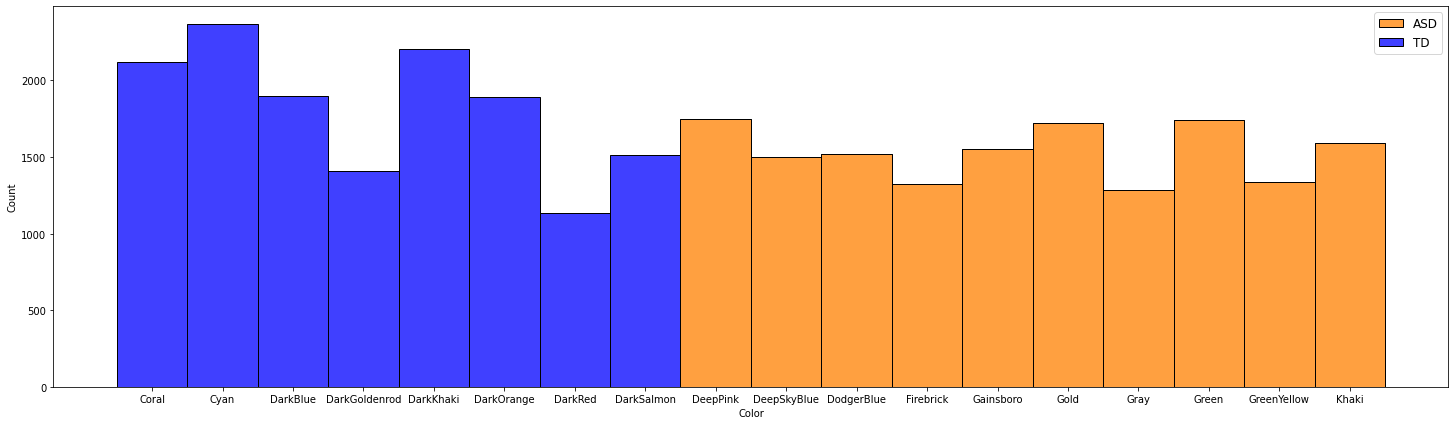

In [22]:
#COLOR OF BALLOON
color = ["#0000ff","#ff8000"]
plt.figure(figsize=(25,7))
ax = sns.histplot(x=df_copy['Color'],data=df_copy,hue="Class",palette=color,multiple="stack")
plt.legend(labels=["ASD","TD"],fontsize = 'large')
plt.xlabel('Color')

* The color of the ballons are not consistent throughout the dataset and so I will remove this column as it will not be helpful. Each color was not tested across both groups meaning that this feature is bias.

Text(0.5, 0, 'Category Group')

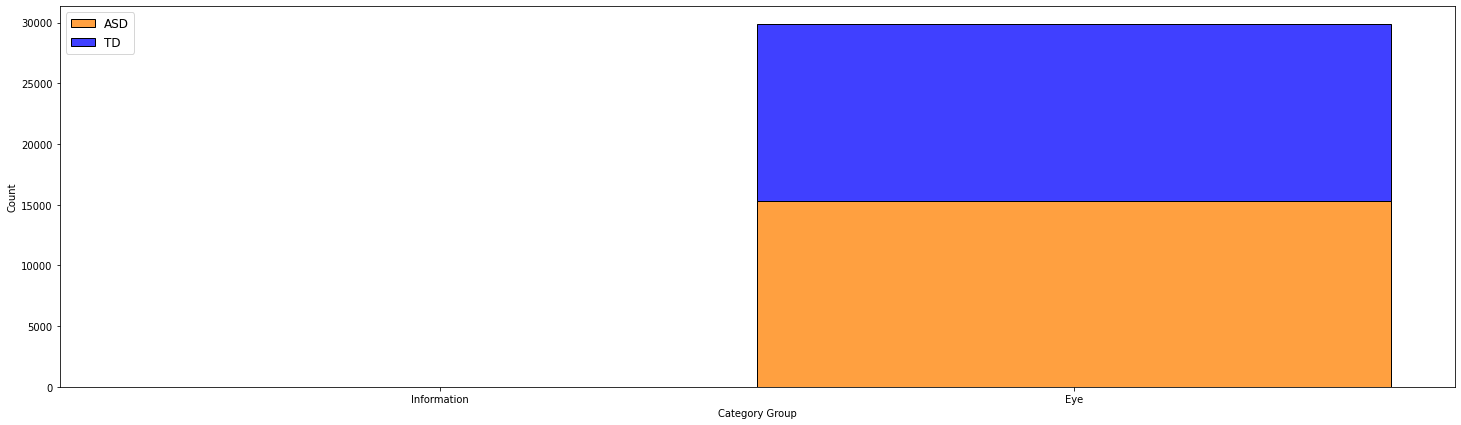

In [23]:
#CATEGORY GROUP
color = ["#0000ff","#ff8000"]
plt.figure(figsize=(25,7))
ax = sns.histplot(x=df_copy['Category Group'],data=df_copy,hue="Class",palette=color,multiple="stack")
plt.legend(labels=["ASD","TD"],fontsize = 'large')
plt.xlabel('Category Group')

* This dataset is entirely from eye tracking so this group will not help with our model as all datapoints are coming from the *Eye* feature.

Text(0.5, 0, 'CARS Score')

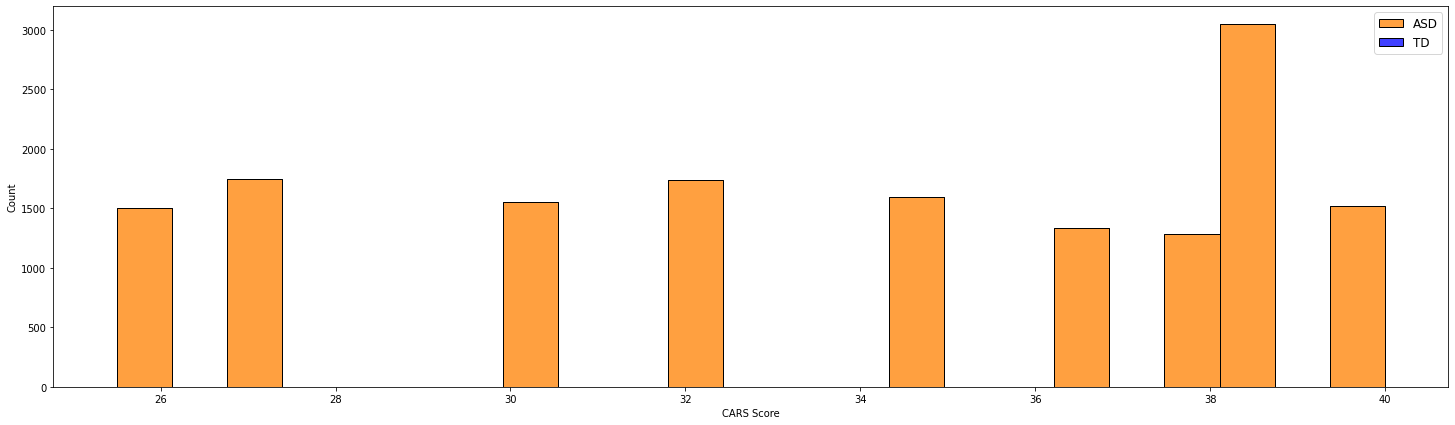

In [24]:
#CARS Score
color = ["#0000ff","#ff8000"]
plt.figure(figsize=(25,7))
ax = sns.histplot(x=df_copy['CARS Score'],data=df_copy,hue="Class",palette=color,multiple="stack")
plt.legend(labels=["ASD","TD"],fontsize = 'large')
plt.xlabel('CARS Score')

* Here I see that only those with ASD have a CARS score. This is because a CARS score is the [Childhood Autism Rating Scale](https://www.ncbi.nlm.nih.gov/pmc/articles/PMC3612531/) and only children who have been tested for an ASD diagnosis will have this score. 
    * I will remove this from our model dataset because I want to use eye tracking data to help the model predict an autism diagnosis on children who have not yet been diagnosed,  or at the very least, tested for autism. 
* From the dataset above, I can see that I can remove the following columns that do not contribute to the predictions of this model; _Category Group, Content, Color, CARS Score, Trial, Stimulus, Row, and Participant_.
* _Time of Day [h:m:s:ms] and Export End Trial Time [ms]_ are not needed as there is already a time measurement feature that contains the recording time. 
* Additionally, I see columns that contain information that is not specified in the paper or data dictionary; _Index Right_ and _Index Left_. There is no description for these two columns and thus, the columns will be removed since the data cannot be interpreted without knowing what the numbers are refering to (For future projects, I would reach out to the study group to ask for a data dictionary.)

In [25]:
df_copy = df_copy.drop(columns=['Row', 'Time of Day [h:m:s:ms]','Trial', 'Stimulus', 'Export End Trial Time [ms]', 'Content'])
df_copy = df_copy.drop(columns=['Category Group', 'Index Right', 'Index Left', 'Participant', 'CARS Score', 'Color'])
df_copy.head()

,RecordingTime [ms],Gender,Age,Class,Tracking Ratio [%],Category Right,Category Left,Pupil Diameter Right [mm],Pupil Diameter Left [mm],Point of Regard Right X [px],Point of Regard Right Y [px],Point of Regard Left X [px],Point of Regard Left Y [px],AOI Name Right,AOI Name Left
0,4780015.315,F,11.5,TD,78.5652,Separator,Separator,NaN,NaN,NaN,NaN,NaN,NaN,-,-
1,4780020.865,F,11.5,TD,78.5652,Fixation,Fixation,4.3785,4.5431,595.6325,375.6149,595.6325,375.6149,corps,corps
2,4780040.758,F,11.5,TD,78.5652,Fixation,Fixation,4.4050,4.5283,597.3023,375.7919,597.3023,375.7919,corps,corps
3,4780080.503,F,11.5,TD,78.5652,Fixation,Fixation,4.4273,4.6036,596.9685,378.2868,596.9685,378.2868,corps,corps
4,4780120.360,F,11.5,TD,78.5652,Fixation,Fixation,4.3514,4.5827,596.4349,378.5467,596.4349,378.5467,corps,corps


In [26]:
for col in df_copy:
    print([col], df_copy[col].unique())
    print(df_copy.shape)

['RecordingTime [ms]'] [4780015.315 4780020.865 4780040.758 ... 4778811.534 4778855.661
 4778899.661]
(29865, 15)
['Gender'] ['F' 'M']
(29865, 15)
['Age'] [11.5 10.7 12.3  6.5  6.8  9.1  4.2 10.1 10.9  5.6 10.6  9.4  6.9  3.2
 11.8 11.7]
(29865, 15)
['Class'] ['TD' 'ASD']
(29865, 15)
['Tracking Ratio [%]'] [78.5652 84.2781 66.6617 44.7703 80.4655 71.1002 19.0861 31.0229 59.4878
 43.099  22.8495 17.0976 41.4214 59.7472 11.6938 51.4179 23.1018 18.7598]
(29865, 15)
['Category Right'] ['Separator' 'Fixation' 'Saccade' '-' 'Blink']
(29865, 15)
['Category Left'] ['Separator' 'Fixation' 'Saccade' 'Blink' '-']
(29865, 15)
['Pupil Diameter Right [mm]'] [   nan 4.3785 4.405  ... 4.5981 4.5424 4.4824]
(29865, 15)
['Pupil Diameter Left [mm]'] [   nan 4.5431 4.5283 ... 2.3315 2.0308 3.4452]
(29865, 15)
['Point of Regard Right X [px]'] [     nan 595.6325 597.3023 ... 883.2581 882.4338 884.6895]
(29865, 15)
['Point of Regard Right Y [px]'] [     nan 375.6149 375.7919 ... 270.4018 366.3419 340.4752]
(

* I are down to 15 columns. I will consider these columns to be features in our dataset. 
    * Class will be our ***Target*** and will be renamed as such.
* I will now look at an [eye tracking article](https://eyeware.tech/blog/what-is-eye-tracking/) to determine what other features I will look at closely.

In [27]:
df_copy.rename(columns={'Class': 'Target'}, inplace=True)
df_copy.head(5)

,RecordingTime [ms],Gender,Age,Target,Tracking Ratio [%],Category Right,Category Left,Pupil Diameter Right [mm],Pupil Diameter Left [mm],Point of Regard Right X [px],Point of Regard Right Y [px],Point of Regard Left X [px],Point of Regard Left Y [px],AOI Name Right,AOI Name Left
0,4780015.315,F,11.5,TD,78.5652,Separator,Separator,NaN,NaN,NaN,NaN,NaN,NaN,-,-
1,4780020.865,F,11.5,TD,78.5652,Fixation,Fixation,4.3785,4.5431,595.6325,375.6149,595.6325,375.6149,corps,corps
2,4780040.758,F,11.5,TD,78.5652,Fixation,Fixation,4.4050,4.5283,597.3023,375.7919,597.3023,375.7919,corps,corps
3,4780080.503,F,11.5,TD,78.5652,Fixation,Fixation,4.4273,4.6036,596.9685,378.2868,596.9685,378.2868,corps,corps
4,4780120.360,F,11.5,TD,78.5652,Fixation,Fixation,4.3514,4.5827,596.4349,378.5467,596.4349,378.5467,corps,corps


In [28]:
print(df_copy.isnull().sum())
print(df_copy.shape)

RecordingTime [ms]               0
Gender                           0
Age                              0
Target                           0
Tracking Ratio [%]               0
Category Right                   0
Category Left                    0
Pupil Diameter Right [mm]       18
Pupil Diameter Left [mm]        18
Point of Regard Right X [px]    18
Point of Regard Right Y [px]    18
Point of Regard Left X [px]     18
Point of Regard Left Y [px]     18
AOI Name Right                   0
AOI Name Left                    0
dtype: int64
(29865, 15)


* I see that there are still a few null values - 18 to be exact. Because our dataframe has many values, I can choose to drop all rows with NA values. This will create a more robost model and may not negatively affect the model because the percentage of missing values is minute in comparison to the complete dataset.

In [29]:
df_copy_n = df_copy
df_copy_n.dropna(inplace=True)
print(df_copy_n.isnull().sum())
print(df_copy_n.shape)


RecordingTime [ms]              0
Gender                          0
Age                             0
Target                          0
Tracking Ratio [%]              0
Category Right                  0
Category Left                   0
Pupil Diameter Right [mm]       0
Pupil Diameter Left [mm]        0
Point of Regard Right X [px]    0
Point of Regard Right Y [px]    0
Point of Regard Left X [px]     0
Point of Regard Left Y [px]     0
AOI Name Right                  0
AOI Name Left                   0
dtype: int64
(29847, 15)


In [30]:
df_copy = df_copy_n
df_copy.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 29847 entries, 1 to 34629
Data columns (total 15 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   RecordingTime [ms]            29847 non-null  float64
 1   Gender                        29847 non-null  object 
 2   Age                           29847 non-null  float64
 3   Target                        29847 non-null  object 
 4   Tracking Ratio [%]            29847 non-null  float64
 5   Category Right                29847 non-null  object 
 6   Category Left                 29847 non-null  object 
 7   Pupil Diameter Right [mm]     29847 non-null  float64
 8   Pupil Diameter Left [mm]      29847 non-null  float64
 9   Point of Regard Right X [px]  29847 non-null  float64
 10  Point of Regard Right Y [px]  29847 non-null  float64
 11  Point of Regard Left X [px]   29847 non-null  float64
 12  Point of Regard Left Y [px]   29847 non-null  float64
 13  A

* Now that I have gone through the dataset and removed all features I found to be irrelevant, I can continue building my model.

## 3.3 Feature Selection <a class="anchor" id="dataset_3_3"></a>
* After the initial feature review, I was able to bring our dataset of 41 columns down to 15 columns. In this next part, I will continue to further specify our selected features of the model. 

In [31]:
df_copy.columns

Index(['RecordingTime [ms]', 'Gender', 'Age', 'Target', 'Tracking Ratio [%]',
       'Category Right', 'Category Left', 'Pupil Diameter Right [mm]',
       'Pupil Diameter Left [mm]', 'Point of Regard Right X [px]',
       'Point of Regard Right Y [px]', 'Point of Regard Left X [px]',
       'Point of Regard Left Y [px]', 'AOI Name Right', 'AOI Name Left'],
      dtype='object')

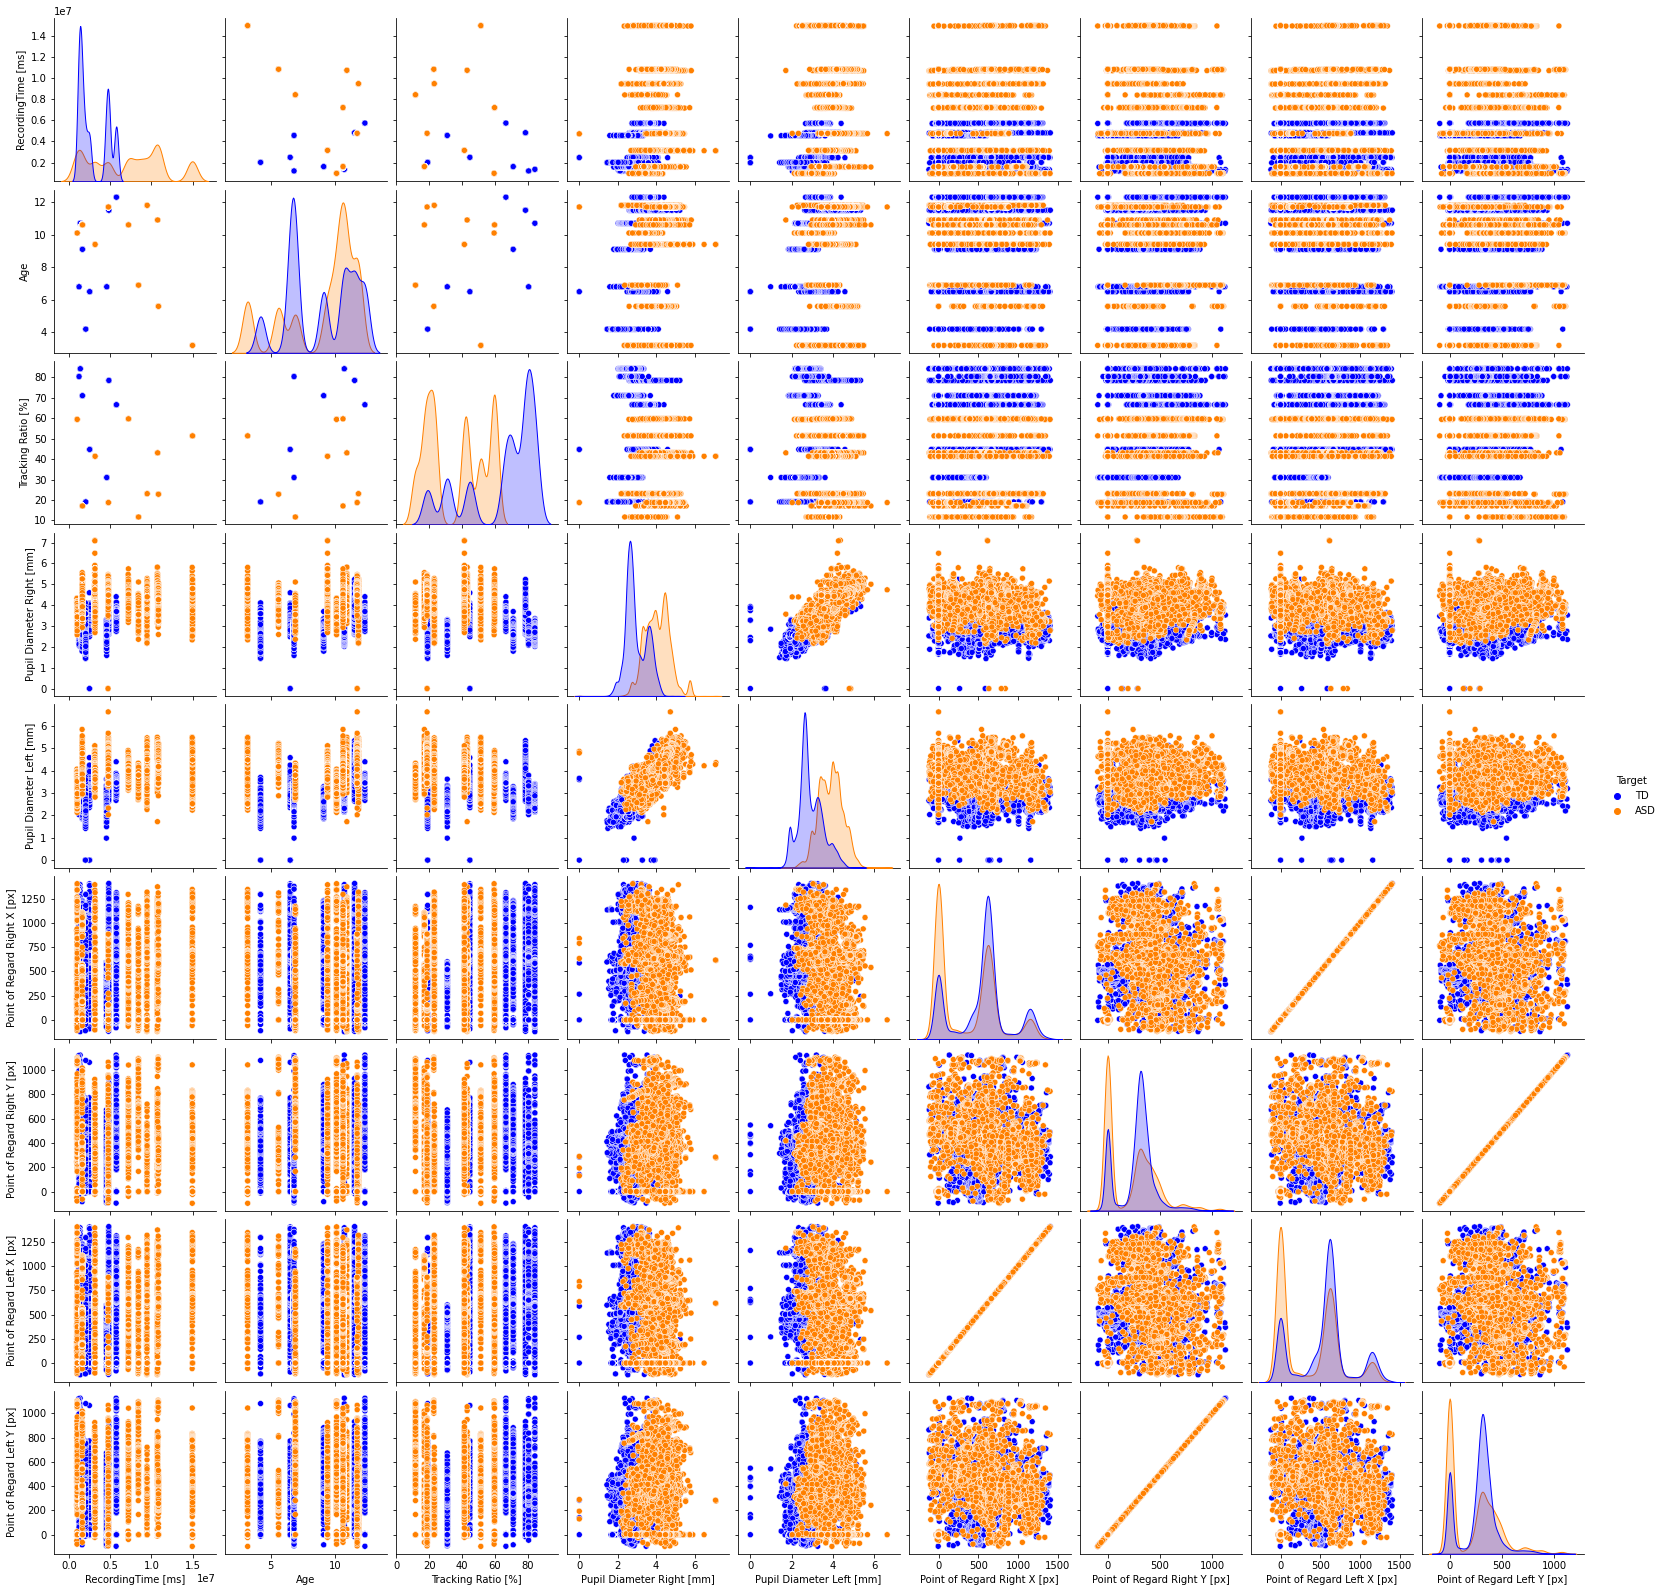

In [32]:
cols = ['RecordingTime [ms]', 'Gender', 'Age', 'Target', 'Tracking Ratio [%]',
       'Category Right', 'Category Left', 'Pupil Diameter Right [mm]',
       'Pupil Diameter Left [mm]', 'Point of Regard Right X [px]',
       'Point of Regard Right Y [px]', 'Point of Regard Left X [px]',
       'Point of Regard Left Y [px]', 'AOI Name Right', 'AOI Name Left']

sns.pairplot(data=df_copy[cols], hue='Target', palette=color);

In [33]:
df_copy.corr()


,RecordingTime [ms],Age,Tracking Ratio [%],Pupil Diameter Right [mm],Pupil Diameter Left [mm],Point of Regard Right X [px],Point of Regard Right Y [px],Point of Regard Left X [px],Point of Regard Left Y [px]
RecordingTime [ms],1.000000,-0.264307,-0.346671,0.420425,0.486246,-0.102205,-0.030636,-0.102205,-0.030636
Age,-0.264307,1.000000,0.233119,0.283579,0.267840,0.093684,0.033670,0.093684,0.033670
Tracking Ratio [%],-0.346671,0.233119,1.000000,-0.325562,-0.321510,0.499013,0.386851,0.499013,0.386851
Pupil Diameter Right [mm],0.420425,0.283579,-0.325562,1.000000,0.900846,-0.161952,0.002297,-0.161952,0.002297
Pupil Diameter Left [mm],0.486246,0.267840,-0.321510,0.900846,1.000000,-0.146187,0.008783,-0.146187,0.008783
Point of Regard Right X [px],-0.102205,0.093684,0.499013,-0.161952,-0.146187,1.000000,0.593610,1.000000,0.593610
Point of Regard Right Y [px],-0.030636,0.033670,0.386851,0.002297,0.008783,0.593610,1.000000,0.593610,1.000000
Point of Regard Left X [px],-0.102205,0.093684,0.499013,-0.161952,-0.146187,1.000000,0.593610,1.000000,0.593610
Point of Regard Left Y [px],-0.030636,0.033670,0.386851,0.002297,0.008783,0.593610,1.000000,0.593610,1.000000


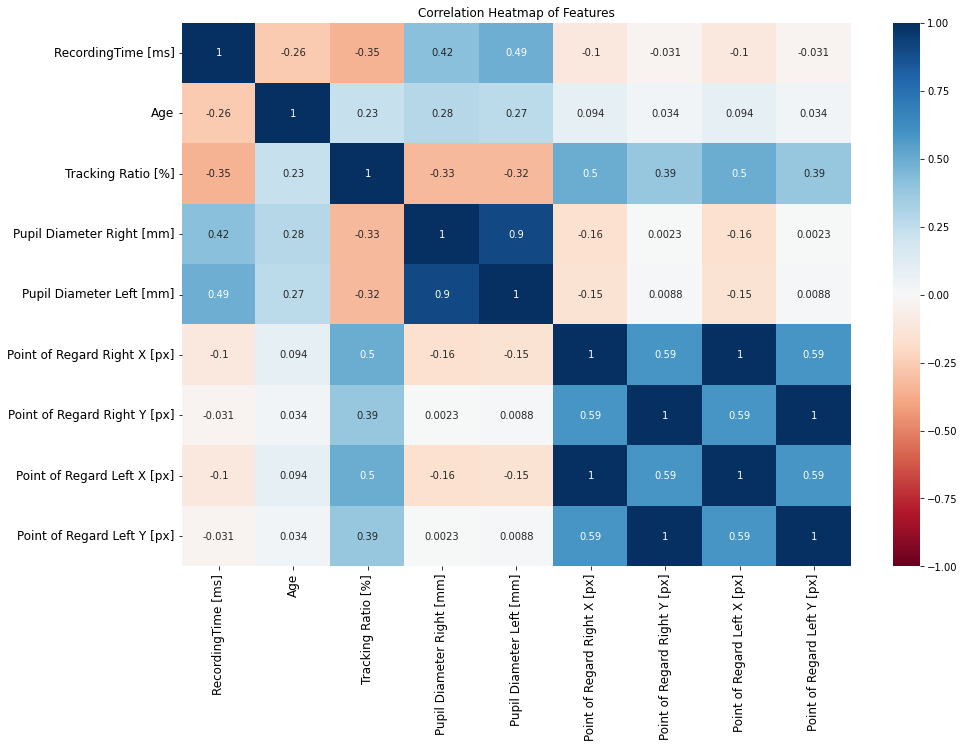

In [ ]:
plt.figure(figsize=(15,10))
s=sns.heatmap(df_copy.corr(), annot= True, cmap='RdBu', vmin=-1, vmax=1)
s.set_yticklabels(s.get_yticklabels(), rotation=0, fontsize=12)
s.set_xticklabels(s.get_xticklabels(), rotation=90, fontsize=12)
plt.title("Correlation Heatmap of Features")
plt.show()

* Orange = TD and Blue = ASD diagnosis
    * From the graph above I can see that the point of regard positions for both the right and left eye are linearly correlated in ASD and TD participants.

* Because this dataset contains data on only 16 participants `'50' '52' '49' '55' '53' '46' '42' '20' '19' '27' '17' '15' '21' '23' '28' '18'` the graphs for Tracking Raio have set X coordinates and the Y coordinate is what is different for each X, in this case X represents the individual participant cases.
* The AOI (Area of Interst) Name Right and Left features are linearly correlated and can be removed from the final feature selection.


In [ ]:
df_copy = df_copy.drop(columns=['AOI Name Right', 'AOI Name Left'])
df_copy.shape

(29847, 13)

## 3.3 Prepare the Final Feature Selection <a class="anchor" id="dataset_3_4"></a>
* We will need to change str objects to numeric values to run PCA and avoid any Value Errors.

#### Avoid `ValueError` when standardizing the data. Convert all str to float64.
* Assign - = 0, corps = 1, BallonInvisible = 2, Pointage D = 3, BallonVisible = 4 in the 'AOI Name Right' and 'AOI Name Left' colums of the dataset. To avoid ValueError when standardizing the data
* Assign - = 0, Fixation = 1, Blink = 2, Saccade = 3 in 'Category Right' and 'Catergory Left' columns of the dataset. To avoid ValueError when standardizing the data.

In [1071]:
#df_copy = pd.DataFrame(df_copy)
#df_copy

,RecordingTime [ms],Gender,Age,Target,Tracking Ratio [%],Category Right,Category Left,Pupil Diameter Right [mm],Pupil Diameter Left [mm],Point of Regard Right X [px],Point of Regard Right Y [px],Point of Regard Left X [px],Point of Regard Left Y [px]
1,4780020.865,F,11.5,TD,78.5652,Fixation,Fixation,4.3785,4.5431,595.6325,375.6149,595.6325,375.6149
2,4780040.758,F,11.5,TD,78.5652,Fixation,Fixation,4.4050,4.5283,597.3023,375.7919,597.3023,375.7919
3,4780080.503,F,11.5,TD,78.5652,Fixation,Fixation,4.4273,4.6036,596.9685,378.2868,596.9685,378.2868
4,4780120.360,F,11.5,TD,78.5652,Fixation,Fixation,4.3514,4.5827,596.4349,378.5467,596.4349,378.5467
5,4780140.235,F,11.5,TD,78.5652,Fixation,Fixation,4.3538,4.5399,599.7004,379.7574,599.7004,379.7574
...,...,...,...,...,...,...,...,...,...,...,...,...,...
34625,4778723.561,M,11.7,ASD,18.7598,Blink,Blink,4.4824,3.4452,0.0000,0.0000,0.0000,0.0000
34626,4778767.535,M,11.7,ASD,18.7598,Blink,Blink,4.4824,3.4452,0.0000,0.0000,0.0000,0.0000
34627,4778811.534,M,11.7,ASD,18.7598,Blink,Blink,4.4824,3.4452,0.0000,0.0000,0.0000,0.0000
34628,4778855.661,M,11.7,ASD,18.7598,Blink,Blink,4.4824,3.4452,0.0000,0.0000,0.0000,0.0000


In [36]:
dict = {"M":0, "F":1}
df_copy['Gender'] = df_copy['Gender'].replace(dict)
df_copy.head()

,RecordingTime [ms],Gender,Age,Target,Tracking Ratio [%],Category Right,Category Left,Pupil Diameter Right [mm],Pupil Diameter Left [mm],Point of Regard Right X [px],Point of Regard Right Y [px],Point of Regard Left X [px],Point of Regard Left Y [px]
1,4780020.865,1,11.5,TD,78.5652,Fixation,Fixation,4.3785,4.5431,595.6325,375.6149,595.6325,375.6149
2,4780040.758,1,11.5,TD,78.5652,Fixation,Fixation,4.4050,4.5283,597.3023,375.7919,597.3023,375.7919
3,4780080.503,1,11.5,TD,78.5652,Fixation,Fixation,4.4273,4.6036,596.9685,378.2868,596.9685,378.2868
4,4780120.360,1,11.5,TD,78.5652,Fixation,Fixation,4.3514,4.5827,596.4349,378.5467,596.4349,378.5467
5,4780140.235,1,11.5,TD,78.5652,Fixation,Fixation,4.3538,4.5399,599.7004,379.7574,599.7004,379.7574


In [37]:
dict = {"-":0, "Fixation":1, "Blink":2, "Saccade":3}
df_copy['Category Right'] = df_copy['Category Right'].replace(dict)
df_copy['Category Left']= df_copy['Category Left'].replace(dict)
df_copy.head()

,RecordingTime [ms],Gender,Age,Target,Tracking Ratio [%],Category Right,Category Left,Pupil Diameter Right [mm],Pupil Diameter Left [mm],Point of Regard Right X [px],Point of Regard Right Y [px],Point of Regard Left X [px],Point of Regard Left Y [px]
1,4780020.865,1,11.5,TD,78.5652,1,1,4.3785,4.5431,595.6325,375.6149,595.6325,375.6149
2,4780040.758,1,11.5,TD,78.5652,1,1,4.4050,4.5283,597.3023,375.7919,597.3023,375.7919
3,4780080.503,1,11.5,TD,78.5652,1,1,4.4273,4.6036,596.9685,378.2868,596.9685,378.2868
4,4780120.360,1,11.5,TD,78.5652,1,1,4.3514,4.5827,596.4349,378.5467,596.4349,378.5467
5,4780140.235,1,11.5,TD,78.5652,1,1,4.3538,4.5399,599.7004,379.7574,599.7004,379.7574


* Quick Note: I did not fill the '-' in Category R/L feature with any data. This feature is a categorical feature containing 3 different eye tracking categories. The. '-' indicated that the experiment did not or could not categorize the eye movement. There were cases where one eye did have movement and it was tracked and the other did not. I decided it was best to not categorize the missing data into an existing eye movement category and instead categorize the non-tracked movement as its own category = 0.

    * Fixation:Fixation:  occur when the eye stops to collect visual data. Although the duration of one is highly variable, the longer a fixation is, the more visual information is processed.
    * Blink: occur rapidly and involuntarily as a result of shutting and opening the eyelids
    * Saccade: are fast “jumps” that the eye performs between fixations in a static environment. The eye moves from one object of interest to another with the goal of acquiring new visual data in high resolution. Due to the extreme speed of saccades, vision is suppressed but they do reveal information about the course of fixations and visual attention.

* Need to convert all string object types to numeric type. below is a summary chart of the conversions. 

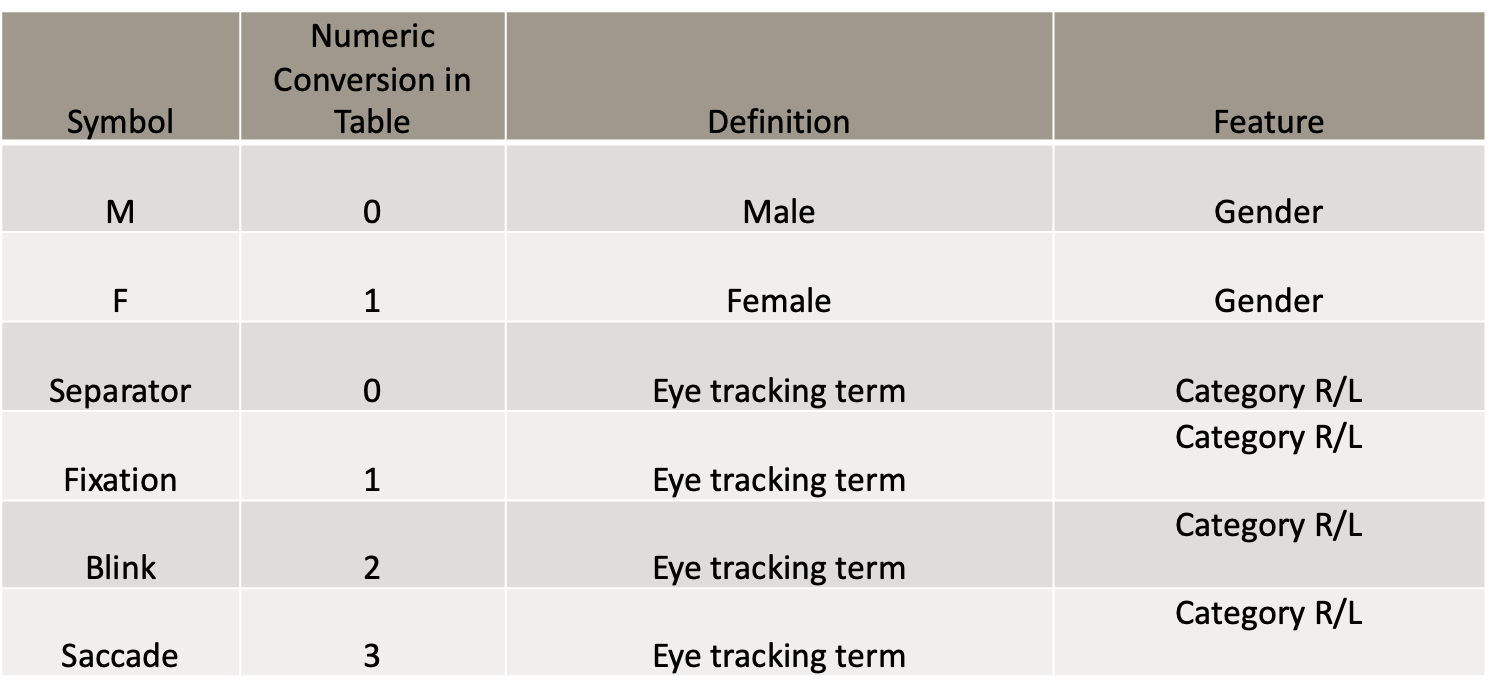

## 4. Model Selection <a class="anchor" id="model_sel"></a>

**Summary** 
* Check balance of the dataset
* Set up Training and Testing datasets
* Scale the dataset
* Test for best fit model
* Select best fit model 

## 4.1 Target Evaluation <a class="anchor" id="model_sel_4_1"></a>
* Evaluate Target to ensure that there is a balance in the dataset.


Text(0, 0.5, 'Count')

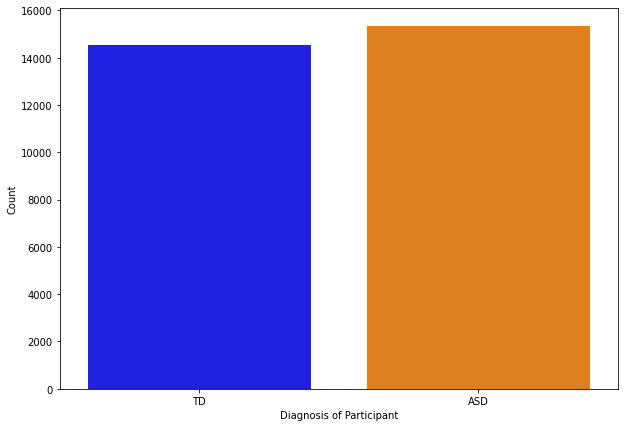

In [38]:
color = ["#0000ff","#ff8000"]
plt.figure(figsize=(10,7))
sns.countplot(x= df_copy["Target"], palette = color)
plt.xlabel('Diagnosis of Participant')
plt.ylabel('Count')

In [39]:
df_copy.Target.value_counts()

ASD    15317
TD     14530
Name: Target, dtype: int64

* Target groups are relatively balanced in the dataset so I can continue.

## 4.2 Set Up Training and Testing Dataset <a class="anchor" id="model_sel_4_1"></a>


In [40]:
features = ['RecordingTime [ms]', 'Gender', 'Age', 'Tracking Ratio [%]',
       'Category Right', 'Category Left', 'Pupil Diameter Right [mm]',
       'Pupil Diameter Left [mm]', 'Point of Regard Right X [px]',
       'Point of Regard Right Y [px]', 'Point of Regard Left X [px]',
       'Point of Regard Left Y [px]']

train_test_split
X = df_copy.loc[:,features]      
y = df_copy.loc[:,'Target']

X_train, X_test, y_train, y_test = \
    train_test_split(X, y, 
                     test_size = 0.20,
                     shuffle = True,                                                    
                     random_state=42)


## 4.3 Best Model Selection <a class="anchor" id="model_sel_4_3"></a>
* I will determine the best model using GridSearchCV from ```sklearn.model_selection```. 

In [41]:
def find_best_model(X, y):
    models = {
        'logistic_regression': {
            'model': LogisticRegression(solver='liblinear', multi_class='auto'),
            'parameters': {
                'C': [1,5,10]
               }
        },
        
        'decision_tree': {
            'model': DecisionTreeClassifier(splitter='best'),
            'parameters': {
                'criterion': ['gini', 'entropy'],
                'max_depth': [5,10,20]
            }
        },
        
        'random_forest': {
            'model': RandomForestClassifier(criterion='gini'),
            'parameters': {
                'n_estimators': [10,15,20,50,100,200]
            }
        },

        
    }
    
    scores = [] 
    
    for model_name, model_params in models.items():
        gs = GridSearchCV(model_params['model'], model_params['parameters'], return_train_score=False)
        gs.fit(X, y)
        scores.append({
            'model': model_name,
            'best_parameters': gs.best_params_,
            'score': gs.best_score_
        })
        
    return pd.DataFrame(scores, columns=['model','best_parameters','score'])

find_best_model(X_train, y_train)

,model,best_parameters,score
0,logistic_regression,{'C': 1},0.717636
1,decision_tree,"{'criterion': 'entropy', 'max_depth': 5}",1.000000
2,random_forest,{'n_estimators': 10},1.000000


* Given that the Decision Tree and Random Forest models are 1.0, we can assume that there is overfitting and thus these are not good models to continue using.
* I want to look more closely at the logistic regression model and see if we can tune it using PCA to reduce dimensionality of the final features. 

## 4.4 Logistic Regression <a class="anchor" id="model_sel_4_4"></a>


In [42]:
log_reg = LogisticRegression(solver='liblinear', multi_class='auto')
log_reg.fit(X_train, y_train)
print('Logistic Regression Accuracy Score: {}'.format(log_reg.score(X_test,y_test)))
print('X_train size: {}, X_test size: {}'.format(X_train.shape, X_test.shape))

Logistic Regression Accuracy Score: 0.7231155778894472
X_train size: (23877, 12), X_test size: (5970, 12)


# 5. Principal Component Analysis (PCA) to Reduce Dimensionality <a class="anchor" id="pca"></a>
* In order to reduce the dimensionality of our data, a PCA analysis will be conducted on all 15 features in the dataframe. 
* PCA is a form of data visualizaiton and will be used in this project to reduce the dimensionality while minimising the loss of important information from our dataset so that I decrease the likelihood of overfitting our model. 
* Review of PCA can be found [here](https://www.youtube.com/watch?v=FgakZw6K1QQ).
* A copy of the dataframe will be made to prevent any changes to the dataframe in use. 

## 5.1 Perform Standard Scaling on Training Dataset Only <a class="anchor" id="pca_5_1"></a>


In [43]:
sc = StandardScaler()

sc.fit(X_train) #Fit on training set only.

X_train_sc = sc.transform(X_train) #Apply transform to both the training set and the test set.
X_test_sc = sc.transform(X_test)
X_train_sc

array([[-1.04286473, -0.70990722,  0.42113659, ..., -1.19445668,
        -1.20540957, -1.19445668],
       [-0.88246234,  1.40863479,  0.0461029 , ..., -1.19445668,
        -1.20540957, -1.19445668],
       [-0.6615075 ,  1.40863479, -0.9289847 , ...,  0.43159894,
         0.54637166,  0.43159894],
       ...,
       [-0.084429  ,  1.40863479,  0.94618375, ...,  0.52660902,
         0.32054319,  0.52660902],
       [-1.04333989, -0.70990722,  0.42113659, ...,  0.22934476,
         0.52370857,  0.22934476],
       [ 0.51767824, -0.70990722,  0.60865343, ..., -1.19445668,
        -1.20540957, -1.19445668]])

## 5.2 Apply PCA to train dataset and test <a class="anchor" id="pca_5_2"></a>


In [44]:
components = None
pca = PCA(n_components = components)
# perform PCA on the scaled data
print(pca.fit(X_train_sc))

PCA()


In [45]:
print("Variances (Percentage):")
print(pca.explained_variance_ratio_ * 100)

print("Cumulative Variances (Percentage):")
print(pca.explained_variance_ratio_.cumsum() * 100)
print()

Variances (Percentage):
[3.13583468e+01 2.05923890e+01 1.40278169e+01 1.11037509e+01
 7.84656069e+00 6.49325939e+00 4.13441451e+00 2.84439494e+00
 8.24267500e-01 7.74799433e-01 4.78556971e-31 2.56297971e-31]
Cumulative Variances (Percentage):
[ 31.35834677  51.95073574  65.97855261  77.08230354  84.92886423
  91.42212362  95.55653813  98.40093307  99.22520057 100.
 100.         100.        ]



Text(0, 0.5, 'Explained variance (%)')

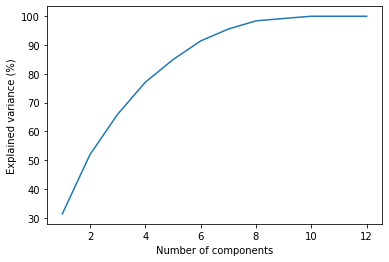

In [46]:
# plot a scree plot
components = len(pca.explained_variance_ratio_) \
    if components is None else components
plt.plot(range(1,components+1), 
         np.cumsum(pca.explained_variance_ratio_ * 100))
plt.xlabel("Number of components")
plt.ylabel("Explained variance (%)")

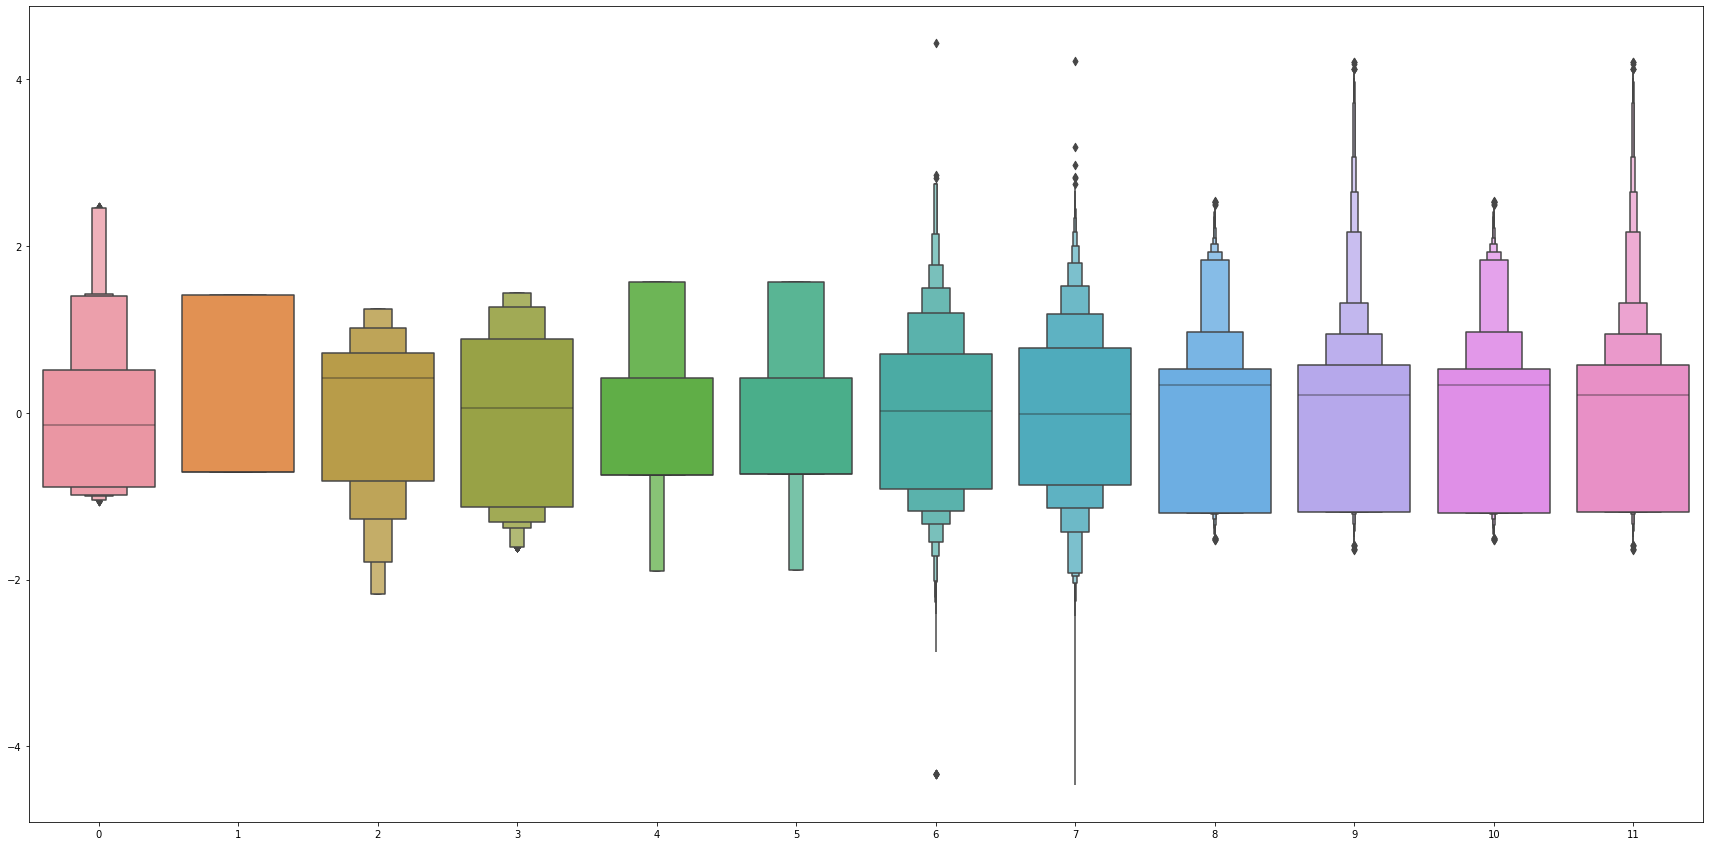

In [47]:
plt.figure(figsize=(30,15))
ax=sns.boxenplot(data = X_train_sc)
plt.show()

In [48]:
pca = PCA(n_components = 0.85)
pca.fit(X_train_sc)
print("Cumulative Variances (Percentage):")
print(np.cumsum(pca.explained_variance_ratio_ * 100))
components = len(pca.explained_variance_ratio_)
print(f'Number of components: {components}')

Cumulative Variances (Percentage):
[31.35834677 51.95073574 65.97855261 77.08230354 84.92886423 91.42212362]
Number of components: 6


## 5.3 Select Min # of Principal Components for Best Retained Variance <a class="anchor" id="pca_5_3"></a>
* n_components = .85 means that scikit-learn will choose the minimum number of principal components so that 90% of the variance is retained.

Text(0, 0.5, 'Explained variance (%)')

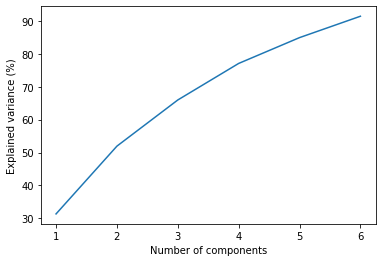

In [49]:
# Make the scree plot
plt.plot(range(1, components + 1), np.cumsum(pca.explained_variance_ratio_ * 100))
plt.xlabel("Number of components")
plt.ylabel("Explained variance (%)")

In [51]:
pca_components = abs(pca.components_)
print([features], pca_components)

[['RecordingTime [ms]', 'Gender', 'Age', 'Tracking Ratio [%]', 'Category Right', 'Category Left', 'Pupil Diameter Right [mm]', 'Pupil Diameter Left [mm]', 'Point of Regard Right X [px]', 'Point of Regard Right Y [px]', 'Point of Regard Left X [px]', 'Point of Regard Left Y [px]']] [[0.14298132 0.10926763 0.05559481 0.347619   0.14349921 0.14332069
  0.15701818 0.15070321 0.45373654 0.41438779 0.45373654 0.41438779]
 [0.3395157  0.12816877 0.14323012 0.17026988 0.29949192 0.30170206
  0.53112371 0.53947084 0.05517431 0.1715605  0.05517431 0.1715605 ]
 [0.15997592 0.00677781 0.10561977 0.04942419 0.62072564 0.61881156
  0.21589107 0.2190117  0.08022479 0.20626232 0.08022479 0.20626232]
 [0.48248385 0.10757532 0.76818729 0.27762927 0.00688381 0.00101115
  0.15544562 0.11093511 0.02738738 0.15879025 0.02738738 0.15879025]
 [0.03886499 0.9748897  0.08764379 0.01983376 0.02701709 0.02900457
  0.06216463 0.14954144 0.03268906 0.07095545 0.03268906 0.07095545]
 [0.31870908 0.05401658 0.0109005

* The higher the magnitude of each feature, the higher importance of the feature. The above data is seen each of the 7 component, and each of the 14 features. 

## 5.4 Top 3 Important Features in each component <a class="anchor" id="pca_5_4"></a>


In [53]:
print('Top 4 most important features in each component')
for row in range(pca_components.shape[0]):
    # get the indices of the top 4 values in each row
    temp = np.argpartition(-(pca_components[row]), 4)
    
   # sort the indices in descending order
    indices = temp[np.argsort((-pca_components[row])[temp])][:4]
    
    # print the top 4 feature names
    print(f'Component {row}: {df_copy.columns[indices].to_list()}')

Top 4 most important features in each component
Component 0: ['Point of Regard Right Y [px]', 'Pupil Diameter Left [mm]', 'Point of Regard Left X [px]', 'Point of Regard Right X [px]']
Component 1: ['Pupil Diameter Right [mm]', 'Category Left', 'RecordingTime [ms]', 'Category Right']
Component 2: ['Tracking Ratio [%]', 'Category Right', 'Pupil Diameter Right [mm]', 'Category Left']
Component 3: ['Age', 'RecordingTime [ms]', 'Target', 'Point of Regard Left X [px]']
Component 4: ['Gender', 'Pupil Diameter Right [mm]', 'Age', 'Point of Regard Right X [px]']
Component 5: ['Pupil Diameter Left [mm]', 'Point of Regard Right Y [px]', 'Point of Regard Left X [px]', 'Point of Regard Right X [px]']


In [54]:
X_pca = pca.transform(X_train_sc)
print(X_pca.shape)
print(X_pca)

(23877, 6)
[[-1.82784629  1.56906705 -0.48090992 -1.33870918 -0.58009876  0.31128753]
 [-1.65841408  3.11801813  0.77175592 -0.74524698  1.30648283  0.27799034]
 [ 1.68873133 -0.2484316  -2.52772887  0.91023488  1.15762168  0.36044219]
 ...
 [ 1.27779777 -1.41293666 -0.07169713 -1.01525708  1.64355228  0.22312197]
 [ 1.20024089  0.01955201 -0.97648014 -0.85494378 -0.81411207  0.0693137 ]
 [-2.46191882 -0.46776626  0.39107883 -1.09713864 -0.20157541 -0.25068196]]


# 6. Model Performance with Pipeline <a class="anchor" id="model_perform"></a>

In [55]:
_sc = StandardScaler()
_pca = PCA(n_components = components)
_model = LogisticRegression()
log_regress_model = Pipeline([
    ('std_scaler', _sc),
    ('pca', _pca),
    ('regressor', _model)
])

In [1199]:
X_train, X_test, y_train, y_test = \
    train_test_split(X, y, 
                     test_size=0.2,
                     shuffle=True, 
                     random_state=42)
# train the model using the PCA components
log_regress_model.fit(X_train,y_train)

Pipeline(steps=[('std_scaler', StandardScaler()), ('pca', PCA(n_components=6)),
                ('regressor', LogisticRegression())])

In [1200]:
score_train = log_regress_model.score(X_train, y_train)
print('training dataset accuracy: ', score_train)

training dataset accuracy:  0.9742848766595469


In [1201]:
score_test = log_regress_model.score(X_test,y_test)
print('testing dataset accuracy: ', score_test)

testing dataset accuracy:  0.9716917922948074


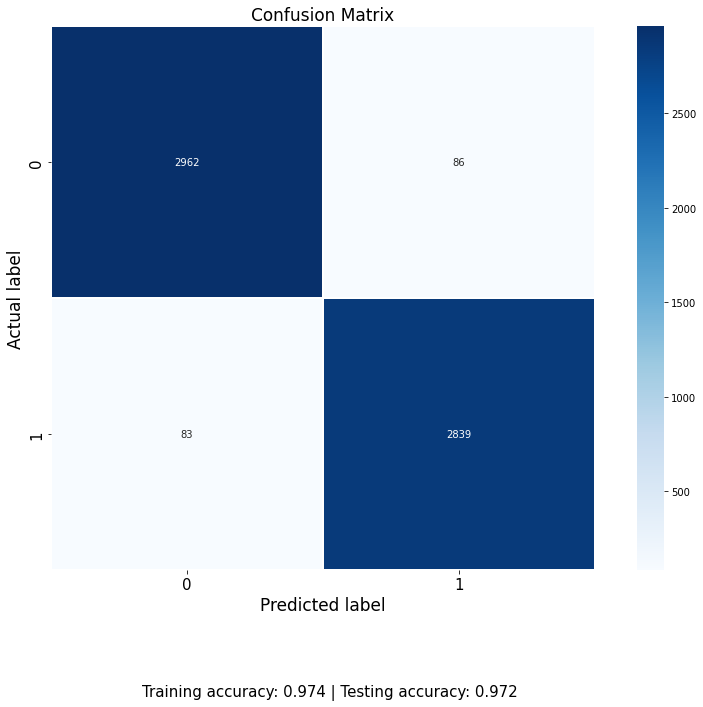

In [1208]:
conf_matrix = metrics.confusion_matrix(y_test, log_regress_model.predict(X_test))
plt.figure(figsize=(15,10))
sns.heatmap(conf_matrix, annot=True, fmt=".0f", linewidths=.5, square=True, cmap='Blues')
plt.ylabel('Actual label', fontsize=17)
plt.xlabel('Predicted label', fontsize=17)
plt.title('Confusion Matrix', size=17)
plt.tick_params(labelsize=15)


training_acc = log_regress_model.score(X_train, y_train);
testing_acc = log_regress_model.score(X_test, y_test);
plt.figtext(0.5, -0.05, f'Training accuracy: {training_acc:.3f} | Testing accuracy: {testing_acc:.3f}',
            ha='center', fontsize=15);

# 7. Conclusion <a class="anchor" id="conclusion"></a>

* Using PCA, I was able to reduce the features to 6 components to enhance the logistic regression machine learning model chosen to predict the autism diagnosis based on eye tracking data. As seen above, the training and testing accuracy are both over 97% correct which leads me to believe that there still may be overfitting occuring. 
* Additionally, it is important to note that this dataset was only a subset of a much larger dataset. There were many datapoints on eye tracking but not much variety in regard to the source of the data points, i.e. the participant dataset in this model was limited to 16. So while there were thousands of dataopints collected per participant, the variance in target was actually small. 
* To improve this model, I would need to re-evaluate my feature selection model.

**Autism Diagnosis Relationship to Eye Tracking Synopsis**
* Age of diagnosis for autism in a child can be crucial to the child's development. This is because if a child is diagnosed earlier, there are interventions that can help the child with developmental milestones in behavior, speech, occupational and physical. This is especially true for children from low income households where families rely on a diagnosis to receive free or reduced cost therapies for their children.
* To learn more about what kind of research is currently being funded by the NIH in this field, you can visit https://magazine.medlineplus.gov/article/eye-tracking-technology-holds-promise-for-earlier-autism-diagnosis.

# 7. References
* Refer to Reference.md file in this repository.